In [116]:
import pandas as pd
import numpy as np
df = pd.read_csv('taxi.csv', index_col = 'Unnamed: 0')

In [117]:
df.head()

,count(1),month,year,dayofweek,hour,pickup_community_area
0,2742,11.0,2014.0,7.0,21.0,32.0
1,200,11.0,2014.0,6.0,23.0,77.0
2,110,4.0,2014.0,7.0,19.0,16.0
3,3205,12.0,2016.0,4.0,16.0,8.0
4,1159,12.0,2014.0,7.0,22.0,24.0


In [118]:
df.size

2876160

In [119]:
df.isnull().values.any()

True

In [120]:
df.isnull().sum()

count(1)                    0
month                       1
year                        1
dayofweek                   1
hour                        1
pickup_community_area    9242
dtype: int64

In [121]:
df.rename(columns={'count(1)':'count'}, inplace=True)


In [122]:
nan_rows = df[df.isnull().T.any().T]
nan_rows.head()

,count,month,year,dayofweek,hour,pickup_community_area
351,3019,12.0,2013.0,5.0,21.0,NaN
356,4253,5.0,2013.0,4.0,19.0,NaN
377,2545,10.0,2015.0,4.0,22.0,NaN
379,5670,6.0,2013.0,1.0,0.0,NaN
410,1835,6.0,2016.0,2.0,22.0,NaN


In [123]:
df=df.dropna(subset=['pickup_community_area'])
df.size

2820708

In [124]:
df.year = df.year.astype(int)
df.month = df.month.astype(int)
df.hour = df.hour.astype(int)
df.dayofweek = df.dayofweek.astype(int)
df.pickup_community_area = df.pickup_community_area.astype(int)
df.head()

,count,month,year,dayofweek,hour,pickup_community_area
0,2742,11,2014,7,21,32
1,200,11,2014,6,23,77
2,110,4,2014,7,19,16
3,3205,12,2016,4,16,8
4,1159,12,2014,7,22,24


In [125]:
df=df[df.year == 2014]
df=df[df.dayofweek == 7]
df=df[df.hour == 18]
df=df[df.month == 11]
df.head()

,count,month,year,dayofweek,hour,pickup_community_area
7179,1,11,2014,7,18,18
13993,2,11,2014,7,18,59
48006,4024,11,2014,7,18,32
48298,1066,11,2014,7,18,24
87560,12,11,2014,7,18,17


In [126]:
df.size

324

In [127]:
df= df.drop(["month", "year", "dayofweek", "hour"], axis=1)

In [128]:
df.columns

Index(['count', 'pickup_community_area'], dtype='object')

In [129]:
df.head()

,count,pickup_community_area
7179,1,18
13993,2,59
48006,4024,32
48298,1066,24
87560,12,17


In [130]:
df.to_csv("out.csv", index=False)

A count matrix, in our case, is a square matrix(two dimensional array) countaining the counts between diffrent neighborhoods taken pairwise between the neighborhoods is our dataset. 

We use the difference calculation of the count matrix to find the difference(in count) between different neighbourhoods. There are 77 neighborhoods in Chicago and so we created a function that creates a 77 by 77 matrix. To this we used the timing function to find the time it takes to run the function. When we manually count the  time run time is 0.414350s. If we use ipython it takes 582 ms ± 218 ms per loop (mean ± std. dev. of 7 runs, 1 loop each. 

We then calculated how long it takes the program to run: once, on average over a bunch of runs, over k=100 runs and it was 0.43325739854000855s. We then used cProfile for performance tuning which resulted in 82595 function calls in 0.420s. After which we used the profiler. I expected the code to run a little slower with %prun. This was because it ran inside the cProfile module, but it was not slower: 82595 function calls ran in 0.414 seconds. To further look into performance, sometimes the cause of the hotspot is a single line in a function, which may not be obvious from reading the source code or analyzing the output of cProfile. We thus used the line profiler. The line_profiler times the execution of each individual line inside a function. Using line_profiler we found out that print() took 3.8s, print(key, end="\t") took 0.8s, and print(count_dict[key] - count_dict[key2], end="\t") took 92.6s. In the future to optimize our code we would edit the line print(count_dict[key] - count_dict[key2], end="\t") so that our code runs faster.


# Python Performance

In [131]:
#manually to time:
#Timing Python Code

import time

start_time = time.time()

import csv


def main():
    # Dictionary to store the count of each community
    count_dict = {}
    # Open the file
    with open('out.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        # Count the number of rows
        num_rows = 0
        for row in csv_reader:
            # If it's the first row, do nothing
            if num_rows != 0:
                count_dict[int(row[1])] = int(row[0])
            num_rows += 1
        # for each key in the dict

        print(0, end="\t")
        for key in sorted(count_dict.keys()):
            print(key, end="\t")
        print()
        # For each key
        for key in sorted(count_dict.keys()):
            # Print the key
            print(key, end="\t")
            # get all the other keys
            for key2 in sorted(count_dict.keys()):
                # Print the difference
                print(count_dict[key] - count_dict[key2], end="\t")
            # print an empty line
            print()
main()

end_time = time.time()

print("run_time: %f" % (end_time - start_time)) # run_time: 0.414350

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-

In [132]:
#if using IPython
%timeit main()  # 582 ms ± 218 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	

6	1970	1932	1572	1882	1755	0	146	-5313	2020	2011	2022	2021	1985	2019	1937	2019	2030	2026	2030	1969	1627	2026	965	2029	2030	429	2025	2028	2014	-1993	1251	2002	2008	2029	2025	2012	1943	2025	2028	2030	2029	2030	2030	1747	2028	2029	2023	2028	2030	2030	2029	2027	953	1777	
7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336	7341	7343	7343	7342	7340	6266	7090	
10	-50	-88	-448	-138	-265	-2020	-1874	-7333	0	-9	2	1	-35	-1	-83	-1	10	6	10	-51	-393	6	-1055	9	10	-1591	5	8	-6	-4013	-769	-18	-12	9	5	-8	-77	5	8	10	9	10	10	-273	8	9	3	8	10	10	9	7	-1067	-243	
11	

13	-51	-89	-449	-139	-266	-2021	-1875	-7334	-1	-10	1	0	-36	-2	-84	-2	9	5	9	-52	-394	5	-1056	8	9	-1592	4	7	-7	-4014	-770	-19	-13	8	4	-9	-78	4	7	9	8	9	9	-274	7	8	2	7	9	9	8	6	-1068	-244	
14	-15	-53	-413	-103	-230	-1985	-1839	-7298	35	26	37	36	0	34	-48	34	45	41	45	-16	-358	41	-1020	44	45	-1556	40	43	29	-3978	-734	17	23	44	40	27	-42	40	43	45	44	45	45	-238	43	44	38	43	45	45	44	42	-1032	-208	
15	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
16	33	-5	-365	-55	-182	-1937	-1791	-7250	83	74	85	84	48	82	0	82	93	89	93	32	-310	89	-972	92	93	-1508	88	91	77	-3930	-686	65	71	92	88	75	6	88	91	93	92	93	93	-190	91	92	86	91	93	93	92	90	-984	-160	
17	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
18	-60	-98	-458	-148	-275	-20

12	-52	-90	-450	-140	-267	-2022	-1876	-7335	-2	-11	0	-1	-37	-3	-85	-3	8	4	8	-53	-395	4	-1057	7	8	-1593	3	6	-8	-4015	-771	-20	-14	7	3	-10	-79	3	6	8	7	8	8	-275	6	7	1	6	8	8	7	5	-1069	-245	
13	-51	-89	-449	-139	-266	-2021	-1875	-7334	-1	-10	1	0	-36	-2	-84	-2	9	5	9	-52	-394	5	-1056	8	9	-1592	4	7	-7	-4014	-770	-19	-13	8	4	-9	-78	4	7	9	8	9	9	-274	7	8	2	7	9	9	8	6	-1068	-244	
14	-15	-53	-413	-103	-230	-1985	-1839	-7298	35	26	37	36	0	34	-48	34	45	41	45	-16	-358	41	-1020	44	45	-1556	40	43	29	-3978	-734	17	23	44	40	27	-42	40	43	45	44	45	45	-238	43	44	38	43	45	45	44	42	-1032	-208	
15	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
16	33	-5	-365	-55	-182	-1937	-1791	-7250	83	74	85	84	48	82	0	82	93	89	93	32	-310	89	-972	92	93	-1508	88	91	77	-3930	-686	65	71	92	88	75	6	88	91	93	92	93	93	-190	91	92	86	91	93	93	92	90	-984	-160	
17	-49	-87	-447	-137	-264	-2019	-187

11	-41	-79	-439	-129	-256	-2011	-1865	-7324	9	0	11	10	-26	8	-74	8	19	15	19	-42	-384	15	-1046	18	19	-1582	14	17	3	-4004	-760	-9	-3	18	14	1	-68	14	17	19	18	19	19	-264	17	18	12	17	19	19	18	16	-1058	-234	
12	-52	-90	-450	-140	-267	-2022	-1876	-7335	-2	-11	0	-1	-37	-3	-85	-3	8	4	8	-53	-395	4	-1057	7	8	-1593	3	6	-8	-4015	-771	-20	-14	7	3	-10	-79	3	6	8	7	8	8	-275	6	7	1	6	8	8	7	5	-1069	-245	
13	-51	-89	-449	-139	-266	-2021	-1875	-7334	-1	-10	1	0	-36	-2	-84	-2	9	5	9	-52	-394	5	-1056	8	9	-1592	4	7	-7	-4014	-770	-19	-13	8	4	-9	-78	4	7	9	8	9	9	-274	7	8	2	7	9	9	8	6	-1068	-244	
14	-15	-53	-413	-103	-230	-1985	-1839	-7298	35	26	37	36	0	34	-48	34	45	41	45	-16	-358	41	-1020	44	45	-1556	40	43	29	-3978	-734	17	23	44	40	27	-42	40	43	45	44	45	45	-238	43	44	38	43	45	45	44	42	-1032	-208	
15	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
16	33	-5	-365	-55	-182	-1937	-1

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-

38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
39	-42	-80	-440	-130	-257	-2012	-1866	-7325	8	-1	10	9	-27	7	-75	7	18	14	18	-43	-385	14	-1047	17	18	-1583	13	16	2	-4005	-761	-10	-4	17	13	0	-69	13	16	18	17	18	18	-265	16	17	11	16	18	18	17	15	-1059	-235	
41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-

In [151]:
# Timing Python Code
# timeit module
# To see how long it takes a program to run: once, on average over a bunch of runs, e.g. over k=100 runs;
import timeit
import csv


def main():
    # Dictionary to store the count of each community
    count_dict = {}
    # Open the file
    with open('out.csv') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        # Count the number of rows
        num_rows = 0
        for row in csv_reader:
            # If it's the first row, do nothing
            if num_rows != 0:
                count_dict[int(row[1])] = int(row[0])
            num_rows += 1
        # for each key in the dict

        print(0, end="\t")
        for key in sorted(count_dict.keys()):
            print(key, end="\t")
        print()
        # For each key
        for key in sorted(count_dict.keys()):
            # Print the key
            print(key, end="\t")
            # get all the other keys
            for key2 in sorted(count_dict.keys()):
                # Print the difference
                print(count_dict[key] - count_dict[key2], end="\t")
            # print an empty line
            print()
main()

k = 100
print(timeit.timeit(main, number=k) / k) # 0.43325739854000855

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145	-929	-105	
5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253

45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1

58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
4

28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4

29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4007	0	3244	3995	4001	4022	4018	4005	3936	4018	4021	4023	4022	4023	4023	3740	4021	4022	4016	4021	4023	4023	4022	4020	2946	3770	
33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	

28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4

34	-32	-70	-430	-120	-247	-2002	-1856	-7315	18	9	20	19	-17	17	-65	17	28	24	28	-33	-375	24	-1037	27	28	-1573	23	26	12	-3995	-751	0	6	27	23	10	-59	23	26	28	27	28	28	-255	26	27	21	26	28	28	27	25	-1049	-225	
35	-38	-76	-436	-126	-253	-2008	-1862	-7321	12	3	14	13	-23	11	-71	11	22	18	22	-39	-381	18	-1043	21	22	-1579	17	20	6	-4001	-757	-6	0	21	17	4	-65	17	20	22	21	22	22	-261	20	21	15	20	22	22	21	19	-1055	-231	
37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
39	-42	-80	-440	-130	-257	-2012	-1866	-7325	8	-1	10	9	-27	7	-75	7	18	14	18	-43	-385	14	-1047	17	18	-1583	13	16	2	-4005	-761	-10	-4	17	13	0	-69	13	16	18	17	18	18	-265	16	17	11	16	18	18	17	15	-1059	-235	
4

24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40

45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1

33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	778	774	761	692	774	777	779	778	779	779	496	777	778	772	777	779	779	778	776	-298	526	
34	-32	-70	-430	-120	-247	-2002	-1856	-7315	18	9	20	19	-17	17	-65	17	28	24	28	-33	-375	24	-1037	27	28	-1573	23	26	12	-3995	-751	0	6	27	23	10	-59	23	26	28	27	28	28	-255	26	27	21	26	28	28	27	25	-1049	-225	
35	-38	-76	-436	-126	-253	-2008	-1862	-7321	12	3	14	13	-23	11	-71	11	22	18	22	-39	-381	18	-1043	21	22	-1579	17	20	6	-4001	-757	-6	0	21	17	4	-65	17	20	22	21	22	22	-261	20	21	15	20	22	22	21	19	-1055	-231	
37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4

43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-

1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145	-929	-105	
5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253

19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
21	1	-37	-397	-87	-214	-1969	-1823	-7282	51	42	53	52	16	50	-32	50	61	57	61	0	-342	57	-1004	60	61	-1540	56	59	45	-3962	-718	33	39	60	56	43	-26	56	59	61	60	61	61	-222	59	60	54	59	61	61	60	58	-1016	-192	
22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	402	396	401	403	403	402	400	-674	150	
23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3

8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336	7341	7343	7343	7342	7340	6266	7090	
10	-50	-88	-448	-138	-265	-2020	-1874	-7333	0	-9	2	1	-35	-1	-83	-1	10	6	10	-51	-393	6	-1055	9	10	-1591	5	8	-6	-4013	-769	-18	-12	9	5	-8	-77	5	8	10	9	10	10	-273	8	9	3	8	10	10	9	7	-1067	-243	
11	-41	-79	-439	-129	-256	-2011	-1865	-7324	9	0	11	10	-26	8	-74	8	19	15	19	-42	-384	15	-1046	18	19	-1582	14	17	3	-4004	-760	-9	-3	18	14	1	-68	14	17	19	18	19	19	-264	17	18	12	17	19	19	18	16	-1058	-234	
12	-52	-90	-450	-140	-267	-2022	-1876	-7335	-2	-11	0	-1	-37	-3	-85	-3	8	4	8	-53	-395	4	-1057	7	8	-1593	3	6	-8	-4015	-771	-20	-14	7	3	-10	-79	3	6	8	7	8	8	-275	6	7	1	6	8	8	7	5	-1069	-245	
13	-51	-89	-449	-139	-266	-2021	-1875	-7334	-1	-10	1	0	-36	-2	-84	-2	9	5	9	-52	-394	5	-1056	8	9	-1592	4	7	-7	-4014	-770	-19	-13	8	4	-9	-78	4	7	9	8	9	9	-2

8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336	7341	7343	7343	7342	7340	6266	7090	
10	-50	-88	-448	-138	-265	-2020	-1874	-7333	0	-9	2	1	-35	-1	-83	-1	10	6	10	-51	-393	6	-1055	9	10	-1591	5	8	-6	-4013	-769	-18	-12	9	5	-8	-77	5	8	10	9	10	10	-273	8	9	3	8	10	10	9	7	-1067	-243	
11	-41	-79	-439	-129	-256	-2011	-1865	-7324	9	0	11	10	-26	8	-74	8	19	15	19	-42	-384	15	-1046	18	19	-1582	14	17	3	-4004	-760	-9	-3	18	14	1	-68	14	17	19	18	19	19	-264	17	18	12	17	19	19	18	16	-1058	-234	
12	-52	-90	-450	-140	-267	-2022	-1876	-7335	-2	-11	0	-1	-37	-3	-85	-3	8	4	8	-53	-395	4	-1057	7	8	-1593	3	6	-8	-4015	-771	-20	-14	7	3	-10	-79	3	6	8	7	8	8	-275	6	7	1	6	8	8	7	5	-1069	-245	
13	-51	-89	-449	-139	-266	-2021	-1875	-7334	-1	-10	1	0	-36	-2	-84	-2	9	5	9	-52	-394	5	-1056	8	9	-1592	4	7	-7	-4014	-770	-19	-13	8	4	-9	-78	4	7	9	8	9	9	-2

5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253	274	270	257	188	270	273	275	274	275	275	-8	273	274	268	273	275	275	274	272	-802	22	
6	1970	1932	1572	1882	1755	0	146	-5313	2020	2011	2022	2021	1985	2019	1937	2019	2030	2026	2030	1969	1627	2026	965	2029	2030	429	2025	2028	2014	-1993	1251	2002	2008	2029	2025	2012	1943	2025	2028	2030	2029	2030	2030	1747	2028	2029	2023	2028	2030	2030	2029	2027	953	1777	
7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336

77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457

68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	

4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145	-929	-105	
5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253	274	270	257	188	270	273	275	274	275	275	-8	273	274	268	273	275	275	274	272	-802	22	
6	1970	1932	1572	1882	1755	0	146	-5313	2020	2011	2022	2021	1985	2019	1937	2019	2030	2026	2030	1969	1627	2026	965	2029	2030	429	2025	2028	2014	-1993	1251	2002	2008	2029	2025	2012	1943	2025	2028	2030	2029	2030	2030	1747	2028	2029	2023	2028	2030	2030	2029	2027	953	1777	
7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7

65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1

58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458

42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
4

8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336	7341	7343	7343	7342	7340	6266	7090	
10	-50	-88	-448	-138	-265	-2020	-1874	-7333	0	-9	2	1	-35	-1	-83	-1	10	6	10	-51	-393	6	-1055	9	10	-1591	5	8	-6	-4013	-769	-18	-12	9	5	-8	-77	5	8	10	9	10	10	-273	8	9	3	8	10	10	9	7	-1067	-243	
11	-41	-79	-439	-129	-256	-2011	-1865	-7324	9	0	11	10	-26	8	-74	8	19	15	19	-42	-384	15	-1046	18	19	-1582	14	17	3	-4004	-760	-9	-3	18	14	1	-68	14	17	19	18	19	19	-264	17	18	12	17	19	19	18	16	-1058	-234	
12	-52	-90	-450	-140	-267	-2022	-1876	-7335	-2	-11	0	-1	-37	-3	-85	-3	8	4	8	-53	-395	4	-1057	7	8	-1593	3	6	-8	-4015	-771	-20	-14	7	3	-10	-79	3	6	8	7	8	8	-275	6	7	1	6	8	8	7	5	-1069	-245	
13	-51	-89	-449	-139	-266	-2021	-1875	-7334	-1	-10	1	0	-36	-2	-84	-2	9	5	9	-52	-394	5	-1056	8	9	-1592	4	7	-7	-4014	-770	-19	-13	8	4	-9	-78	4	7	9	8	9	9	-2

77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457

77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457

41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98

25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20

15	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
16	33	-5	-365	-55	-182	-1937	-1791	-7250	83	74	85	84	48	82	0	82	93	89	93	32	-310	89	-972	92	93	-1508	88	91	77	-3930	-686	65	71	92	88	75	6	88	91	93	92	93	93	-190	91	92	86	91	93	93	92	90	-984	-160	
17	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
18	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-14

44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282

60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	

58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458

56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-107

41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98

28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4

24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40

35	-38	-76	-436	-126	-253	-2008	-1862	-7321	12	3	14	13	-23	11	-71	11	22	18	22	-39	-381	18	-1043	21	22	-1579	17	20	6	-4001	-757	-6	0	21	17	4	-65	17	20	22	21	22	22	-261	20	21	15	20	22	22	21	19	-1055	-231	
37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
39	-42	-80	-440	-130	-257	-2012	-1866	-7325	8	-1	10	9	-27	7	-75	7	18	14	18	-43	-385	14	-1047	17	18	-1583	13	16	2	-4005	-761	-10	-4	17	13	0	-69	13	16	18	17	18	18	-265	16	17	11	16	18	18	17	15	-1059	-235	
41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	

56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-107

33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	778	774	761	692	774	777	779	778	779	779	496	777	778	772	777	779	779	778	776	-298	526	
34	-32	-70	-430	-120	-247	-2002	-1856	-7315	18	9	20	19	-17	17	-65	17	28	24	28	-33	-375	24	-1037	27	28	-1573	23	26	12	-3995	-751	0	6	27	23	10	-59	23	26	28	27	28	28	-255	26	27	21	26	28	28	27	25	-1049	-225	
35	-38	-76	-436	-126	-253	-2008	-1862	-7321	12	3	14	13	-23	11	-71	11	22	18	22	-39	-381	18	-1043	21	22	-1579	17	20	6	-4001	-757	-6	0	21	17	4	-65	17	20	22	21	22	22	-261	20	21	15	20	22	22	21	19	-1055	-231	
37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4

61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-2

1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145	-929	-105	
5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253

19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
21	1	-37	-397	-87	-214	-1969	-1823	-7282	51	42	53	52	16	50	-32	50	61	57	61	0	-342	57	-1004	60	61	-1540	56	59	45	-3962	-718	33	39	60	56	43	-26	56	59	61	60	61	61	-222	59	60	54	59	61	61	60	58	-1016	-192	
22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	402	396	401	403	403	402	400	-674	150	
23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3

18	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
21	1	-37	-397	-87	-214	-1969	-1823	-7282	51	42	53	52	16	50	-32	50	61	57	61	0	-342	57	-1004	60	61	-1540	56	59	45	-3962	-718	33	39	60	56	43	-26	56	59	61	60	61	61	-222	59	60	54	59	61	61	60	58	-1016	-192	
22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	

18	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
21	1	-37	-397	-87	-214	-1969	-1823	-7282	51	42	53	52	16	50	-32	50	61	57	61	0	-342	57	-1004	60	61	-1540	56	59	45	-3962	-718	33	39	60	56	43	-26	56	59	61	60	61	61	-222	59	60	54	59	61	61	60	58	-1016	-192	
22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	

18	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
21	1	-37	-397	-87	-214	-1969	-1823	-7282	51	42	53	52	16	50	-32	50	61	57	61	0	-342	57	-1004	60	61	-1540	56	59	45	-3962	-718	33	39	60	56	43	-26	56	59	61	60	61	61	-222	59	60	54	59	61	61	60	58	-1016	-192	
22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	

25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20

15	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
16	33	-5	-365	-55	-182	-1937	-1791	-7250	83	74	85	84	48	82	0	82	93	89	93	32	-310	89	-972	92	93	-1508	88	91	77	-3930	-686	65	71	92	88	75	6	88	91	93	92	93	93	-190	91	92	86	91	93	93	92	90	-984	-160	
17	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
18	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-14

23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	159

43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-

1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145	-929	-105	
5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253

14	-15	-53	-413	-103	-230	-1985	-1839	-7298	35	26	37	36	0	34	-48	34	45	41	45	-16	-358	41	-1020	44	45	-1556	40	43	29	-3978	-734	17	23	44	40	27	-42	40	43	45	44	45	45	-238	43	44	38	43	45	45	44	42	-1032	-208	
15	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
16	33	-5	-365	-55	-182	-1937	-1791	-7250	83	74	85	84	48	82	0	82	93	89	93	32	-310	89	-972	92	93	-1508	88	91	77	-3930	-686	65	71	92	88	75	6	88	91	93	92	93	93	-190	91	92	86	91	93	93	92	90	-984	-160	
17	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
18	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
19	-56

38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
39	-42	-80	-440	-130	-257	-2012	-1866	-7325	8	-1	10	9	-27	7	-75	7	18	14	18	-43	-385	14	-1047	17	18	-1583	13	16	2	-4005	-761	-10	-4	17	13	0	-69	13	16	18	17	18	18	-265	16	17	11	16	18	18	17	15	-1059	-235	
41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-

37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
39	-42	-80	-440	-130	-257	-2012	-1866	-7325	8	-1	10	9	-27	7	-75	7	18	14	18	-43	-385	14	-1047	17	18	-1583	13	16	2	-4005	-761	-10	-4	17	13	0	-69	13	16	18	17	18	18	-265	16	17	11	16	18	18	17	15	-1059	-235	
41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	

46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1

34	-32	-70	-430	-120	-247	-2002	-1856	-7315	18	9	20	19	-17	17	-65	17	28	24	28	-33	-375	24	-1037	27	28	-1573	23	26	12	-3995	-751	0	6	27	23	10	-59	23	26	28	27	28	28	-255	26	27	21	26	28	28	27	25	-1049	-225	
35	-38	-76	-436	-126	-253	-2008	-1862	-7321	12	3	14	13	-23	11	-71	11	22	18	22	-39	-381	18	-1043	21	22	-1579	17	20	6	-4001	-757	-6	0	21	17	4	-65	17	20	22	21	22	22	-261	20	21	15	20	22	22	21	19	-1055	-231	
37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
39	-42	-80	-440	-130	-257	-2012	-1866	-7325	8	-1	10	9	-27	7	-75	7	18	14	18	-43	-385	14	-1047	17	18	-1583	13	16	2	-4005	-761	-10	-4	17	13	0	-69	13	16	18	17	18	18	-265	16	17	11	16	18	18	17	15	-1059	-235	
4

23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	159

20	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
21	1	-37	-397	-87	-214	-1969	-1823	-7282	51	42	53	52	16	50	-32	50	61	57	61	0	-342	57	-1004	60	61	-1540	56	59	45	-3962	-718	33	39	60	56	43	-26	56	59	61	60	61	61	-222	59	60	54	59	61	61	60	58	-1016	-192	
22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	402	396	401	403	403	402	400	-674	150	
23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060

21	1	-37	-397	-87	-214	-1969	-1823	-7282	51	42	53	52	16	50	-32	50	61	57	61	0	-342	57	-1004	60	61	-1540	56	59	45	-3962	-718	33	39	60	56	43	-26	56	59	61	60	61	61	-222	59	60	54	59	61	61	60	58	-1016	-192	
22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	402	396	401	403	403	402	400	-674	150	
23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	

30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4007	0	3244	3995	4001	4022	4018	4005	3936	4018	4021	4023	4022	4023	4023	3740	4021	4022	4016	4021	4023	4023	4022	4020	2946	3770	
33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	778	774	761	692	774	777	779	778	779	779	496	777	778	772	777	779	779	778	776	-298	526	
34	-32	-70	-430	-120	-247	-2002	-1856	-7315	18	9	20	19	-17	17	-65	17	28	24	28	-33	-375	24	-1037	27	28	-

58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458

76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97

69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	6

60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	

45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1

60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	

43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-

27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	

37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
38	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
39	-42	-80	-440	-130	-257	-2012	-1866	-7325	8	-1	10	9	-27	7	-75	7	18	14	18	-43	-385	14	-1047	17	18	-1583	13	16	2	-4005	-761	-10	-4	17	13	0	-69	13	16	18	17	18	18	-265	16	17	11	16	18	18	17	15	-1059	-235	
41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	

29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4007	0	3244	3995	4001	4022	4018	4005	3936	4018	4021	4023	4022	4023	4023	3740	4021	4022	4016	4021	4023	4023	4022	4020	2946	3770	
33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	

29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4007	0	3244	3995	4001	4022	4018	4005	3936	4018	4021	4023	4022	4023	4023	3740	4021	4022	4016	4021	4023	4023	4022	4020	2946	3770	
33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	

23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	159

22	343	305	-55	255	128	-1627	-1481	-6940	393	384	395	394	358	392	310	392	403	399	403	342	0	399	-662	402	403	-1198	398	401	387	-3620	-376	375	381	402	398	385	316	398	401	403	402	403	403	120	401	402	396	401	403	403	402	400	-674	150	
23	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-

6	1970	1932	1572	1882	1755	0	146	-5313	2020	2011	2022	2021	1985	2019	1937	2019	2030	2026	2030	1969	1627	2026	965	2029	2030	429	2025	2028	2014	-1993	1251	2002	2008	2029	2025	2012	1943	2025	2028	2030	2029	2030	2030	1747	2028	2029	2023	2028	2030	2030	2029	2027	953	1777	
7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336	7341	7343	7343	7342	7340	6266	7090	
10	-50	-88	-448	-138	-265	-2020	-1874	-7333	0	-9	2	1	-35	-1	-83	-1	10	6	10	-51	-393	6	-1055	9	10	-1591	5	8	-6	-4013	-769	-18	-12	9	5	-8	-77	5	8	10	9	10	10	-273	8	9	3	8	10	10	9	7	-1067	-243	
11	

5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253	274	270	257	188	270	273	275	274	275	275	-8	273	274	268	273	275	275	274	272	-802	22	
6	1970	1932	1572	1882	1755	0	146	-5313	2020	2011	2022	2021	1985	2019	1937	2019	2030	2026	2030	1969	1627	2026	965	2029	2030	429	2025	2028	2014	-1993	1251	2002	2008	2029	2025	2012	1943	2025	2028	2030	2029	2030	2030	1747	2028	2029	2023	2028	2030	2030	2029	2027	953	1777	
7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336

68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	

58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458

42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
4

42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
4

41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98

29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4007	0	3244	3995	4001	4022	4018	4005	3936	4018	4021	4023	4022	4023	4023	3740	4021	4022	4016	4021	4023	4023	4022	4020	2946	3770	
33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	

24	1005	967	607	917	790	-965	-819	-6278	1055	1046	1057	1056	1020	1054	972	1054	1065	1061	1065	1004	662	1061	0	1064	1065	-536	1060	1063	1049	-2958	286	1037	1043	1064	1060	1047	978	1060	1063	1065	1064	1065	1065	782	1063	1064	1058	1063	1065	1065	1064	1062	-12	812	
25	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
27	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
28	1541	1503	1143	1453	1326	-429	-283	-5742	1591	1582	1593	1592	1556	1590	1508	1590	1601	1597	1601	1540	1198	1597	536	1600	1601	0	1596	1599	1585	-2422	822	1573	1579	1600	1596	1583	1514	1596	1599	1601	1600	1601	1601	1318	1599	1600	1594	1599	1601	1601	1600	1598	524	1348	
29	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40

7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336	7341	7343	7343	7342	7340	6266	7090	
10	-50	-88	-448	-138	-265	-2020	-1874	-7333	0	-9	2	1	-35	-1	-83	-1	10	6	10	-51	-393	6	-1055	9	10	-1591	5	8	-6	-4013	-769	-18	-12	9	5	-8	-77	5	8	10	9	10	10	-273	8	9	3	8	10	10	9	7	-1067	-243	
11	-41	-79	-439	-129	-256	-2011	-1865	-7324	9	0	11	10	-26	8	-74	8	19	15	19	-42	-384	15	-1046	18	19	-1582	14	17	3	-4004	-760	-9	-3	18	14	1	-68	14	17	19	18	19	19	-264	17	18	12	17	19	19	18	16	-1058	-234	
12	-52	-90	-450	-140	-267	-2022	-1876	-7335	-2	-11	0	-1	-37	-3	-85	-3	

69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	6

77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457

5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253	274	270	257	188	270	273	275	274	275	275	-8	273	274	268	273	275	275	274	272	-802	22	
6	1970	1932	1572	1882	1755	0	146	-5313	2020	2011	2022	2021	1985	2019	1937	2019	2030	2026	2030	1969	1627	2026	965	2029	2030	429	2025	2028	2014	-1993	1251	2002	2008	2029	2025	2012	1943	2025	2028	2030	2029	2030	2030	1747	2028	2029	2023	2028	2030	2030	2029	2027	953	1777	
7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336

4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145	-929	-105	
5	215	177	-183	127	0	-1755	-1609	-7068	265	256	267	266	230	264	182	264	275	271	275	214	-128	271	-790	274	275	-1326	270	273	259	-3748	-504	247	253	274	270	257	188	270	273	275	274	275	275	-8	273	274	268	273	275	275	274	272	-802	22	
6	1970	1932	1572	1882	1755	0	146	-5313	2020	2011	2022	2021	1985	2019	1937	2019	2030	2026	2030	1969	1627	2026	965	2029	2030	429	2025	2028	2014	-1993	1251	2002	2008	2029	2025	2012	1943	2025	2028	2030	2029	2030	2030	1747	2028	2029	2023	2028	2030	2030	2029	2027	953	1777	
7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7

77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457

61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-2

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

16	33	-5	-365	-55	-182	-1937	-1791	-7250	83	74	85	84	48	82	0	82	93	89	93	32	-310	89	-972	92	93	-1508	88	91	77	-3930	-686	65	71	92	88	75	6	88	91	93	92	93	93	-190	91	92	86	91	93	93	92	90	-984	-160	
17	-49	-87	-447	-137	-264	-2019	-1873	-7332	1	-8	3	2	-34	0	-82	0	11	7	11	-50	-392	7	-1054	10	11	-1590	6	9	-5	-4012	-768	-17	-11	10	6	-7	-76	6	9	11	10	11	11	-272	9	10	4	9	11	11	10	8	-1066	-242	
18	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
19	-56	-94	-454	-144	-271	-2026	-1880	-7339	-6	-15	-4	-5	-41	-7	-89	-7	4	0	4	-57	-399	0	-1061	3	4	-1597	-1	2	-12	-4019	-775	-24	-18	3	-1	-14	-83	-1	2	4	3	4	4	-279	2	3	-3	2	4	4	3	1	-1073	-249	
20	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
21	1	

7	1824	1786	1426	1736	1609	-146	0	-5459	1874	1865	1876	1875	1839	1873	1791	1873	1884	1880	1884	1823	1481	1880	819	1883	1884	283	1879	1882	1868	-2139	1105	1856	1862	1883	1879	1866	1797	1879	1882	1884	1883	1884	1884	1601	1882	1883	1877	1882	1884	1884	1883	1881	807	1631	
8	7283	7245	6885	7195	7068	5313	5459	0	7333	7324	7335	7334	7298	7332	7250	7332	7343	7339	7343	7282	6940	7339	6278	7342	7343	5742	7338	7341	7327	3320	6564	7315	7321	7342	7338	7325	7256	7338	7341	7343	7342	7343	7343	7060	7341	7342	7336	7341	7343	7343	7342	7340	6266	7090	
10	-50	-88	-448	-138	-265	-2020	-1874	-7333	0	-9	2	1	-35	-1	-83	-1	10	6	10	-51	-393	6	-1055	9	10	-1591	5	8	-6	-4013	-769	-18	-12	9	5	-8	-77	5	8	10	9	10	10	-273	8	9	3	8	10	10	9	7	-1067	-243	
11	-41	-79	-439	-129	-256	-2011	-1865	-7324	9	0	11	10	-26	8	-74	8	19	15	19	-42	-384	15	-1046	18	19	-1582	14	17	3	-4004	-760	-9	-3	18	14	1	-68	14	17	19	18	19	19	-264	17	18	12	17	19	19	18	16	-1058	-234	
12	-52	-90	-450	-140	-267	-2022	-1876	-7335	-2	-11	0	-1	-37	-3	-85	-3	

77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457

46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1

45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
49	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1

58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458

32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4007	0	3244	3995	4001	4022	4018	4005	3936	4018	4021	4023	4022	4023	4023	3740	4021	4022	4016	4021	4023	4023	4022	4020	2946	3770	
33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	778	774	761	692	774	777	779	778	779	779	496	777	778	772	777	779	779	778	776	-298	526	
34	-32	-70	-430	-120	-247	-2002	-1856	-7315	18	9	20	19	-17	17	-65	17	28	24	28	-33	-375	24	-1037	27	28	-1573	23	26	12	-3995	-751	0	6	27	23	10	-59	23	26	28	27	28	28	-255	26	27	21	26	28	28	27	25	-1049	-225	
35	-38	-76	-436	-126	-253	-2008	-1862	-7321	12	3	14	13	-23	11	-71	11	22	18	22	-39	-381	18	-1043	21	22	-1579	17	20	6	-4001	-757	-6	0	21	17	4	-65	17	20	22	21	22	22	-261	20	21	15	20	22	22	21	19	-1055	-231	
37	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	

42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
4

30	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
31	-44	-82	-442	-132	-259	-2014	-1868	-7327	6	-3	8	7	-29	5	-77	5	16	12	16	-45	-387	12	-1049	15	16	-1585	11	14	0	-4007	-763	-12	-6	15	11	-2	-71	11	14	16	15	16	16	-267	14	15	9	14	16	16	15	13	-1061	-237	
32	3963	3925	3565	3875	3748	1993	2139	-3320	4013	4004	4015	4014	3978	4012	3930	4012	4023	4019	4023	3962	3620	4019	2958	4022	4023	2422	4018	4021	4007	0	3244	3995	4001	4022	4018	4005	3936	4018	4021	4023	4022	4023	4023	3740	4021	4022	4016	4021	4023	4023	4022	4020	2946	3770	
33	719	681	321	631	504	-1251	-1105	-6564	769	760	771	770	734	768	686	768	779	775	779	718	376	775	-286	778	779	-822	774	777	763	-3244	0	751	757	778	774	761	692	774	777	779	778	779	779	496	777	778	772	777	779	779	778	776	-298	526	
34	-32	-70	-430	-120	-247	-2002	-1856	-7315	18	9	20	19	-17	17	-65	17	28	24	28	-33	-375	24	-1037	27	28	-

41	27	-11	-371	-61	-188	-1943	-1797	-7256	77	68	79	78	42	76	-6	76	87	83	87	26	-316	83	-978	86	87	-1514	82	85	71	-3936	-692	59	65	86	82	69	0	82	85	87	86	87	87	-196	85	86	80	85	87	87	86	84	-990	-166	
42	-55	-93	-453	-143	-270	-2025	-1879	-7338	-5	-14	-3	-4	-40	-6	-88	-6	5	1	5	-56	-398	1	-1060	4	5	-1596	0	3	-11	-4018	-774	-23	-17	4	0	-13	-82	0	3	5	4	5	5	-278	3	4	-2	3	5	5	4	2	-1072	-248	
43	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
44	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
45	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
46	-60	-98

56	223	185	-175	135	8	-1747	-1601	-7060	273	264	275	274	238	272	190	272	283	279	283	222	-120	279	-782	282	283	-1318	278	281	267	-3740	-496	255	261	282	278	265	196	278	281	283	282	283	283	0	281	282	276	281	283	283	282	280	-794	30	
58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-107

# Performance Tuning

In [136]:
import cProfile
import re
cProfile.run('main()')

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

67	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
68	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-

In [137]:
#run a code with the profiler
# I expected the code to run a little slower with %prun. This was because it ran inside the cProfile module, but it was not slower.
%prun main()

0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	-3875	-631	120	126	147	143	130	61	143	146	148	147	148	148	-135	146	147	141	146	148	148	147	145

58	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
59	-59	-97	-457	-147	-274	-2029	-1883	-7342	-9	-18	-7	-8	-44	-10	-92	-10	1	-3	1	-60	-402	-3	-1064	0	1	-1600	-4	-1	-15	-4022	-778	-27	-21	0	-4	-17	-86	-4	-1	1	0	1	1	-282	-1	0	-6	-1	1	1	0	-2	-1076	-252	
60	-53	-91	-451	-141	-268	-2023	-1877	-7336	-3	-12	-1	-2	-38	-4	-86	-4	7	3	7	-54	-396	3	-1058	6	7	-1594	2	5	-9	-4016	-772	-21	-15	6	2	-11	-80	2	5	7	6	7	7	-276	5	6	0	5	7	7	6	4	-1070	-246	
61	-58	-96	-456	-146	-273	-2028	-1882	-7341	-8	-17	-6	-7	-43	-9	-91	-9	2	-2	2	-59	-401	-2	-1063	1	2	-1599	-3	0	-14	-4021	-777	-26	-20	1	-3	-16	-85	-3	0	2	1	2	2	-281	0	1	-5	0	2	2	1	-1	-1075	-251	
65	-60	-98	-458	-148	-275	-2030	-1884	-7343	-10	-19	-8	-9	-45	-11	-93	-11	0	-4	0	-61	-403	-4	-1065	-1	0	-1601	-5	-2	-16	-4023	-779	-28	-22	-1	-5	-18	-87	-5	-2	0	-1	0	0	-283	-2	-1	-7	-2	0	0	-1	-3	-1077	-253	
67	-60	-98	-458

         82595 function calls in 0.414 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     6108    0.344    0.000    0.344    0.000 socket.py:334(send)
     6105    0.016    0.000    0.400    0.000 iostream.py:382(write)
     6108    0.013    0.000    0.376    0.000 iostream.py:195(schedule)
     3080    0.010    0.000    0.409    0.000 {built-in method builtins.print}
     6108    0.007    0.000    0.015    0.000 threading.py:1104(is_alive)
     6105    0.004    0.000    0.005    0.000 iostream.py:307(_is_master_process)
     6108    0.004    0.000    0.004    0.000 {method 'acquire' of '_thread.lock' objects}
     6108    0.003    0.000    0.007    0.000 threading.py:1062(_wait_for_tstate_lock)
        1    0.003    0.003    0.414    0.414 <ipython-input-131-7fb1632257a3>:8(main)
     6108    0.002    0.000    0.002    0.000 iostream.py:93(_event_pipe)
     6105    0.001    0.000    0.002    0.000 iostream.py:320(_schedule_flush)
     6105    0.001    0.000    0.001    0.000 {built-in method builtins.isinstance}
     6105    0.001    0.000    0.001    0.000 {built-in method posix.getpid}
     6108    0.001    0.000    0.001    0.000 threading.py:506(is_set)
     6108    0.001    0.000    0.001    0.000 {method 'append' of 'collections.deque' objects}
        1    0.001    0.001    0.001    0.001 {built-in method io.open}
       56    0.001    0.000    0.001    0.000 {built-in method builtins.sorted}
        1    0.000    0.000    0.414    0.414 {built-in method builtins.exec}
       56    0.000    0.000    0.000    0.000 {method 'keys' of 'dict' objects}
        1    0.000    0.000    0.414    0.414 <string>:1(<module>)
        2    0.000    0.000    0.000    0.000 codecs.py:318(decode)
        1    0.000    0.000    0.000    0.000 _bootlocale.py:23(getpreferredencoding)
        1    0.000    0.000    0.000    0.000 {built-in method _csv.reader}
        2    0.000    0.000    0.000    0.000 {built-in method _codecs.utf_8_decode}
        1    0.000    0.000    0.000    0.000 {built-in method _locale.nl_langinfo}
        1    0.000    0.000    0.000    0.000 codecs.py:308(__init__)
        1    0.000    0.000    0.000    0.000 codecs.py:259(__init__)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}

In [152]:
# Sometimes the cause of the hotspot is a single line in a function, which may not be obvious from reading the source code or analyzing the output of cProfile.
# The line_profiler times the execution of each individual line inside a function. The line_profiler can be used by loading in Jupyer as:

%load_ext line_profiler

%lprun -f main main()

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler
0	1	2	3	4	5	6	7	8	10	11	12	13	14	15	16	17	18	19	20	21	22	23	24	25	27	28	29	30	31	32	33	34	35	37	38	39	41	42	43	44	45	46	49	56	58	59	60	61	65	67	68	69	76	77	
1	0	-38	-398	-88	-215	-1970	-1824	-7283	50	41	52	51	15	49	-33	49	60	56	60	-1	-343	56	-1005	59	60	-1541	55	58	44	-3963	-719	32	38	59	55	42	-27	55	58	60	59	60	60	-223	58	59	53	58	60	60	59	57	-1017	-193	
2	38	0	-360	-50	-177	-1932	-1786	-7245	88	79	90	89	53	87	5	87	98	94	98	37	-305	94	-967	97	98	-1503	93	96	82	-3925	-681	70	76	97	93	80	11	93	96	98	97	98	98	-185	96	97	91	96	98	98	97	95	-979	-155	
3	398	360	0	310	183	-1572	-1426	-6885	448	439	450	449	413	447	365	447	458	454	458	397	55	454	-607	457	458	-1143	453	456	442	-3565	-321	430	436	457	453	440	371	453	456	458	457	458	458	175	456	457	451	456	458	458	457	455	-619	205	
4	88	50	-310	0	-127	-1882	-1736	-7195	138	129	140	139	103	137	55	137	148	144	148	87	-255	144	-917	147	148	-1453	143	146	132	

69	-57	-95	-455	-145	-272	-2027	-1881	-7340	-7	-16	-5	-6	-42	-8	-90	-8	3	-1	3	-58	-400	-1	-1062	2	3	-1598	-2	1	-13	-4020	-776	-25	-19	2	-2	-15	-84	-2	1	3	2	3	3	-280	1	2	-4	1	3	3	2	0	-1074	-250	
76	1017	979	619	929	802	-953	-807	-6266	1067	1058	1069	1068	1032	1066	984	1066	1077	1073	1077	1016	674	1073	12	1076	1077	-524	1072	1075	1061	-2946	298	1049	1055	1076	1072	1059	990	1072	1075	1077	1076	1077	1077	794	1075	1076	1070	1075	1077	1077	1076	1074	0	824	
77	193	155	-205	105	-22	-1777	-1631	-7090	243	234	245	244	208	242	160	242	253	249	253	192	-150	249	-812	252	253	-1348	248	251	237	-3770	-526	225	231	252	248	235	166	248	251	253	252	253	253	-30	251	252	246	251	253	253	252	250	-824	0	


Timer unit: 1e-06 s

Total time: 0.685175 s
File: <ipython-input-151-4e0ae6e1a1ac>
Function: main at line 7

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     7                                           def main():
     8                                               # Dictionary to store the count of each community
     9         1          3.0      3.0      0.0      count_dict = {}
    10                                               # Open the file
    11         1        928.0    928.0      0.1      with open('out.csv') as csv_file:
    12         1         28.0     28.0      0.0          csv_reader = csv.reader(csv_file, delimiter=',')
    13                                                   # Count the number of rows
    14         1          1.0      1.0      0.0          num_rows = 0
    15        56       3275.0     58.5      0.5          for row in csv_reader:
    16                                                       # If it's the first row, do nothing
    17        55        168.0      3.1      0.0              if num_rows != 0:
    18        54        256.0      4.7      0.0                  count_dict[int(row[1])] = int(row[0])
    19        55         65.0      1.2      0.0              num_rows += 1
    20                                                   # for each key in the dict
    21                                           
    22         1        433.0    433.0      0.1          print(0, end="\t")
    23        55        197.0      3.6      0.0          for key in sorted(count_dict.keys()):
    24        54       5259.0     97.4      0.8              print(key, end="\t")
    25         1         23.0     23.0      0.0          print()
    26                                                   # For each key
    27        55       1071.0     19.5      0.2          for key in sorted(count_dict.keys()):
    28                                                       # Print the key
    29        54       5720.0    105.9      0.8              print(key, end="\t")
    30                                                       # get all the other keys
    31      2970       7638.0      2.6      1.1              for key2 in sorted(count_dict.keys()):
    32                                                           # Print the difference
    33      2916     634259.0    217.5     92.6                  print(count_dict[key] - count_dict[key2], end="\t")
    34                                                       # print an empty line
    35        54      25851.0    478.7      3.8              print()

In [143]:
#year 2017

In [141]:
df2 = pd.read_csv('euc_dataset.csv')

In [142]:
df2.head()

,Unnamed: 0,count(1),month,year,dayofweek,hour,pickup_community_area,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,0,62,4,2017,2,14,8.0,41.893216,-87.637844,41.880994,-87.632746
1,1,86,3,2017,4,11,8.0,41.893216,-87.637844,41.880994,-87.632746
2,2,5,2,2017,4,20,8.0,41.898332,-87.620763,41.907520,-87.626659
3,3,3,5,2017,6,20,8.0,41.898332,-87.620763,41.898306,-87.653614
4,4,2,4,2017,2,17,24.0,41.892658,-87.652534,41.893216,-87.637844


In [144]:
df2.rename(columns={'count(1)':'count'}, inplace=True)

run_time: 1.068689


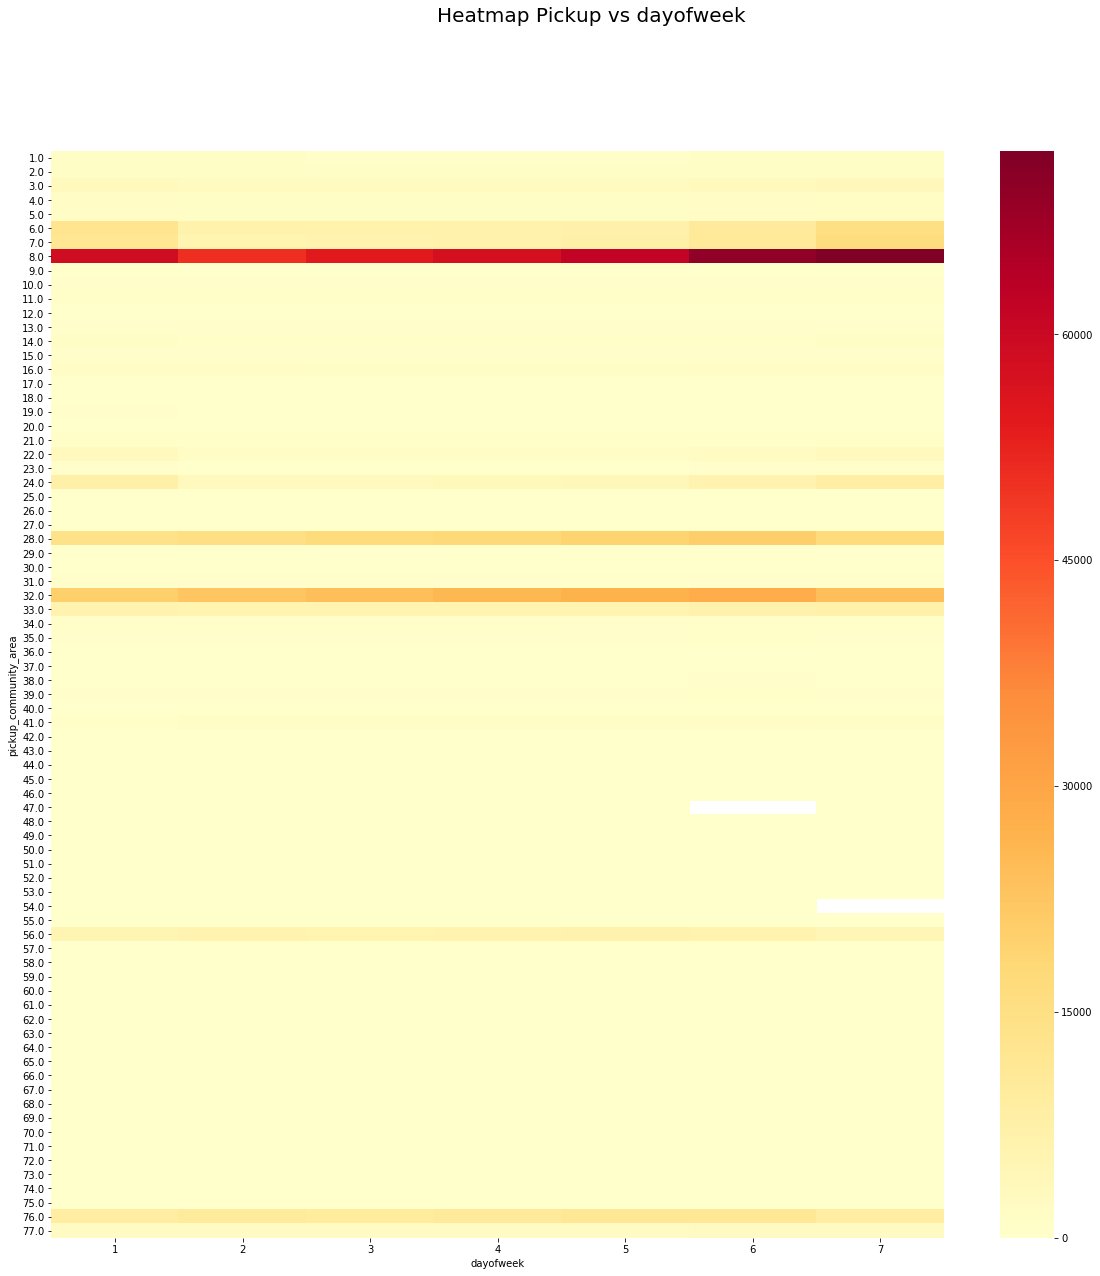

In [160]:
import time

start_time = time.time()
df2['count'] = 1
pvtdf = df2.pivot_table(values = 'count', index=['pickup_community_area'], columns=['dayofweek'], 
                         aggfunc=np.sum)
fig, ax = plt.subplots()
ax.set_facecolor('white') # background color is white (by default it is light blue)
sns.heatmap(pvtdf, cmap='YlOrRd', ax=ax)
plt.suptitle('Heatmap Pickup vs dayofweek', size=20)
mpl.rcParams['figure.figsize'] = (20.0, 20.0)
end_time = time.time()

print("run_time: %f" % (end_time - start_time))

Neighborhood 8, Near North Side, has the most pickups on all the days of the week. Near North Side has the second largest total area, the highest number of skyscrapers, and the largest population.

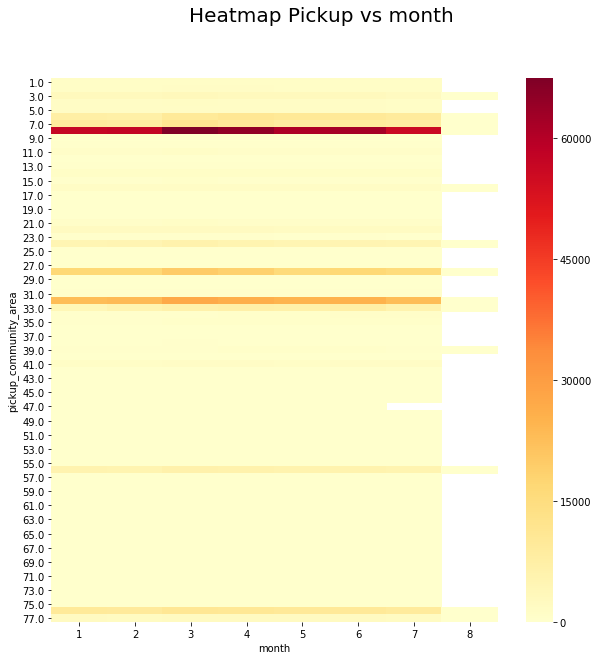

In [162]:

df2['count'] = 1
pvtdf = df2.pivot_table(values = 'count', index=['pickup_community_area'], columns=['month'], 
                         aggfunc=np.sum)
fig, ax = plt.subplots()
ax.set_facecolor('white') # background color is white (by default it is light blue)
sns.heatmap(pvtdf, cmap='YlOrRd', ax=ax)
plt.suptitle('Heatmap Pickup vs month', size=20)
mpl.rcParams['figure.figsize'] = (20.0, 20.0)

Neighborhood 8, Near North Side, has the most pickups on all the days of the month. Near North Side has the second largest total area, the highest number of skyscrapers, and the largest population.

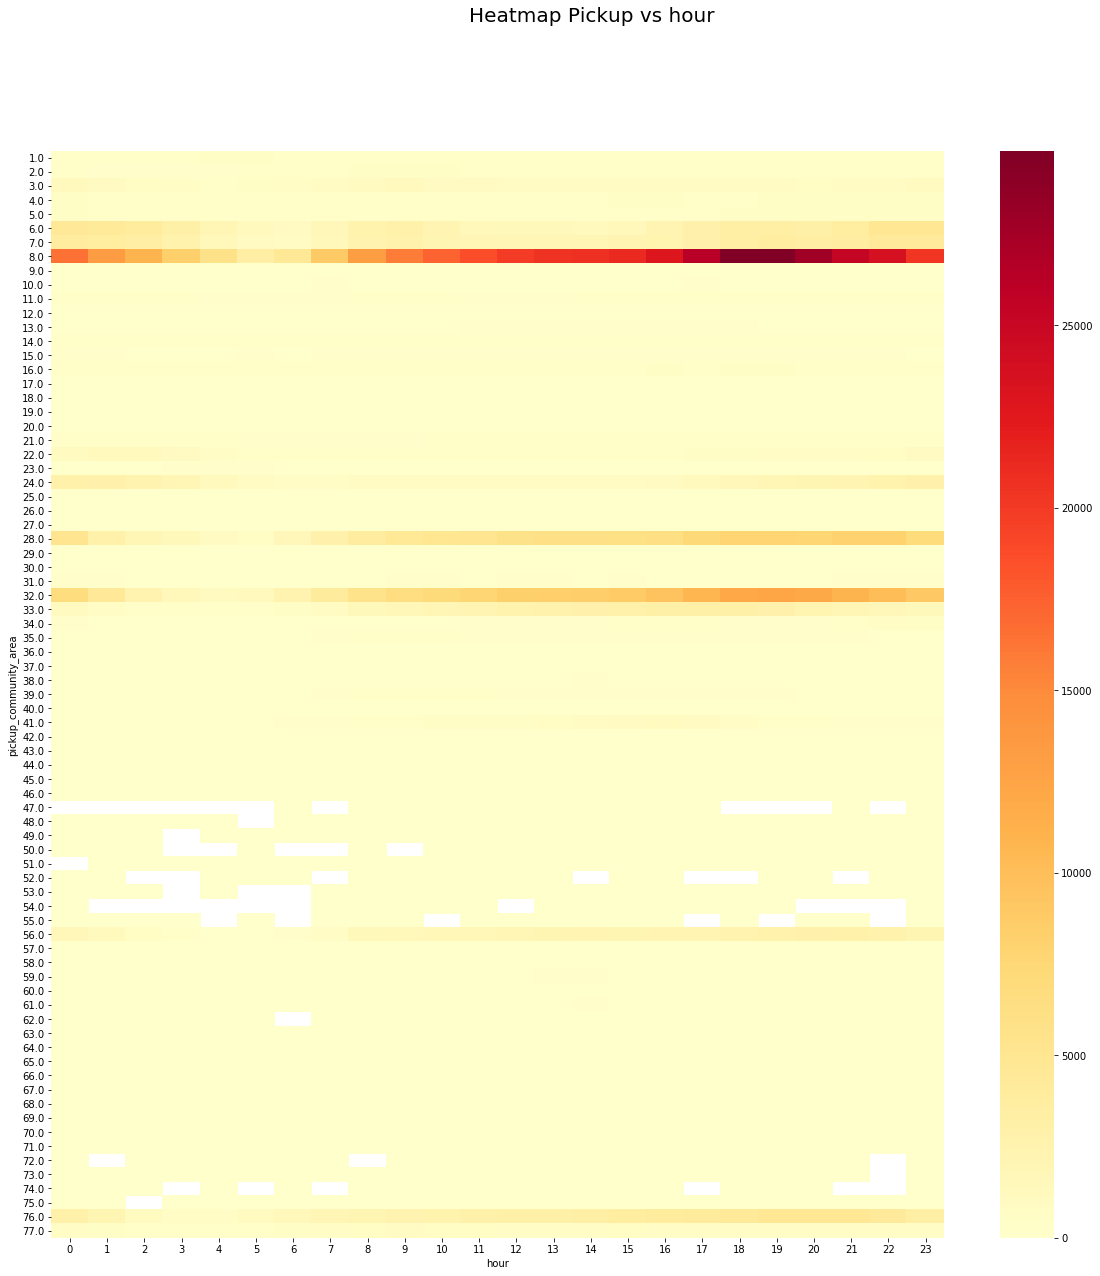

In [163]:

df2['count'] = 1
pvtdf = df2.pivot_table(values = 'count', index=['pickup_community_area'], columns=['hour'], 
                         aggfunc=np.sum)
fig, ax = plt.subplots()
ax.set_facecolor('white') # background color is white (by default it is light blue)
sns.heatmap(pvtdf, cmap='YlOrRd', ax=ax)
plt.suptitle('Heatmap Pickup vs hour', size=20)
mpl.rcParams['figure.figsize'] = (20.0, 20.0)

Neighborhood 8, Near North Side, has the most pickups on all the hours of the day. Near North Side has the second largest total area, the highest number of skyscrapers, and the largest population.

The pickup locations using Pickup lat  and longs and type of graph as scatter. Plotting this, we visualize the shape of Chicago in the form of a map.

run_time: 5.325261


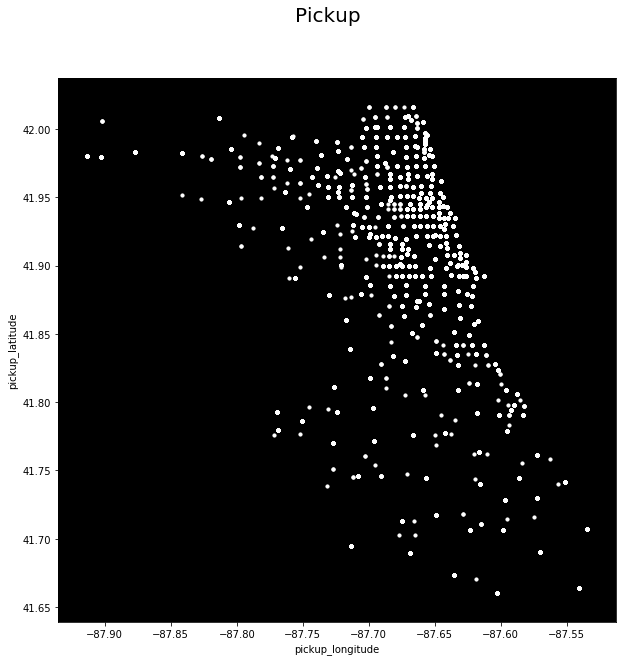

In [164]:
import time
start_time = time.time()
new_style = {'grid': False} #Remove grid  
mpl.rc('axes', **new_style)   
mpl.rcParams['figure.figsize'] = (10, 10)   
P=df2.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',color='white',s=10)
P.set_facecolor('black')
plt.suptitle('Pickup', size=20)
end_time = time.time()

print("run_time: %f" % (end_time - start_time))

Text(0.5, 0.98, 'Dropoff')

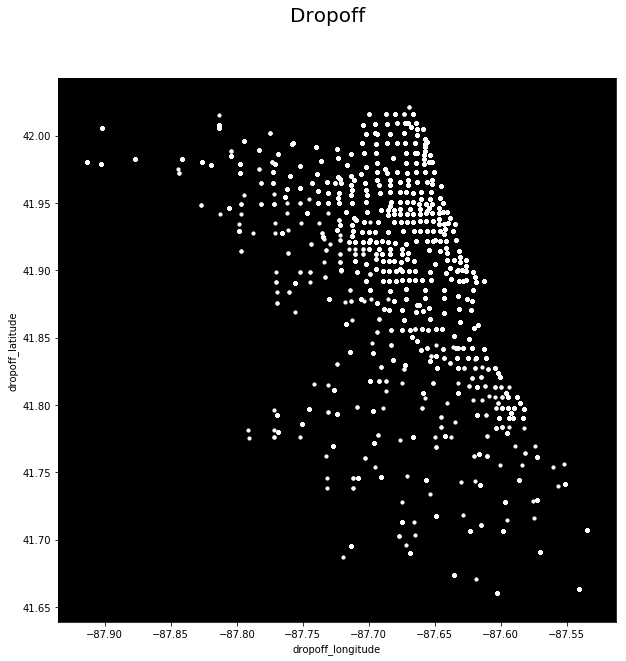

In [165]:
new_style = {'grid': False} #Remove grid  
mpl.rc('axes', **new_style)   
mpl.rcParams['figure.figsize'] = (10, 10)   
P=df2.plot(kind='scatter', x='dropoff_longitude', y='dropoff_latitude',color='white',s=10)
P.set_facecolor('black')
plt.suptitle('Dropoff', size=20)